Code from: https://github.com/denizyuret/Knet.jl
https://github.com/denizyuret/IAP2019/blob/master/06.rnn.ipynb

In [1]:
using Pkg
for p in ("Knet","ProgressMeter","Plots")
    haskey(Pkg.installed(),p) || Pkg.add(p)
end

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed ProgressMeter ─ v1.3.2
  Updating `~/.julia/environments/v1.0/Project.toml`
  [92933f4c] + ProgressMeter v1.3.2
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [92933f4c] + ProgressMeter v1.3.2
 Resolving package versions...
 Installed Plots ─────────── v1.0.14
 Installed Showoff ───────── v0.3.1
 Installed RecipesBase ───── v1.0.2
 Installed PlotUtils ─────── v0.6.5
 Installed GR ────────────── v0.48.0
 Installed Measures ──────── v0.3.1
 Installed PlotThemes ────── v1.0.3
 Installed FFMPEG ────────── v0.2.4
 Installed RecipesPipeline ─ v0.1.12
 Installed GeometryTypes ─── v0.8.3
 Installed Contour ───────── v0.5.4
  Updating `~/.julia/environments/v1.0/Project.toml`
  [91a5bcdd] + Plots v1.0.14
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  

In [2]:
using Knet: Knet
include(Knet.dir("data/nltk.jl"))
(data,words,tags) = brown()
println("The Brown Corpus has $(length(data)) sentences, $(sum(length(p[1]) for p in data)) tokens, with a word vocabulary of $(length(words)) and a tag vocabulary of $(length(tags)).")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [a5390f91] + ZipFile v0.8.4
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [033835bb] + JLD2 v0.1.14
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [5789e2e9] + FileIO v1.4.1
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3236k  100 3236k    0     0  1523k      0  0:00:02  0:00:02 --:--:-- 1523k


The Brown Corpus has 57340 sentences, 1161192 tokens, with a word vocabulary of 56057 and a tag vocabulary of 472.


In [3]:
summary.((data,words,tags))

("57340-element Array{Tuple{Array{UInt16,1},Array{UInt16,1}},1}", "56057-element Array{String,1}", "472-element Array{String,1}")

In [36]:
data[1][1]

25-element Array{UInt16,1}:
 0x000f
 0x16e4
 0x0510
 0x15dd
 0x443c
 0x003c
 0x075e
 0x0023
 0x0a31
 0x0004
 0x456e
 0x0254
 0x0491
 0x05fc
 0x04bc
 0x000d
 0x0044
 0x01de
 0x000e
 0x0009
 0x0055
 0x2714
 0x00dd
 0x00bd
 0x0003

In [28]:
ENV["COLUMNS"]=120
(w,t) = first(data)
display(permutedims([w t]))
display(permutedims([words[w] tags[t]]))

2×25 Array{UInt16,2}:
 0x000f  0x16e4  0x0510  0x15dd  0x443c  0x003c  0x075e  …  0x000e  0x0009  0x0055  0x2714  0x00dd  0x00bd  0x0003
 0x0003  0x0028  0x0015  0x0027  0x0015  0x000d  0x003a     0x001d  0x000e  0x002e  0x0007  0x000d  0x0001  0x0005

2×25 Array{String,2}:
 "The"  "Fulton"  "County"  "Grand"  "Jury"   "said"  …  "that"  "any"  "irregularities"  "took"  "place"  "."
 "at"   "np-tl"   "nn-tl"   "jj-tl"  "nn-tl"  "vbd"      "cs"    "dti"  "nns"             "vbd"   "nn"     "."

In [5]:
using Knet: param
struct Embed; w; end
Embed(vocabsize::Int,embedsize::Int) = Embed(param(embedsize,vocabsize))
(e::Embed)(x) = e.w[:,x]

In [6]:
embedlayer = Embed(length(words),8)
(w,t) = data[52855]
display(permutedims(words[w]))
display(permutedims(w))
display(embedlayer(w))

1×7 Array{String,2}:
 "Rapping"  "the"  "stick"  "against"  "the"  "desk"  "."

1×7 Array{UInt16,2}:
 0xbb1c  0x0001  0x0bc6  0x00a3  0x0001  0x06b7  0x0003

8×7 Array{Float32,2}:
  0.00567037   0.008474      0.00662631  -0.00901087   0.008474      0.00311569    0.00695813
 -0.00838005  -0.00880567    0.00461481  -0.0103032   -0.00880567   -0.000887158   0.00108732
  0.0099913    0.00958763   -0.00374042   0.00526158   0.00958763   -0.00262525    0.00929186
  0.00726531   0.000871422   0.00169646   0.00914014   0.000871422   0.00804647   -0.00684638
 -0.0099764   -0.0090244     0.00252914  -0.0078729   -0.0090244    -0.00889658   -0.00204566
 -0.0040813    0.000194906  -0.0053435    0.00161934   0.000194906  -0.00830476    0.00421359
  0.00981257   0.00908034    0.00155301   0.00159139   0.00908034    0.00593248   -0.00658478
  0.0019101   -0.00132115    0.00758135   0.00307811  -0.00132115   -0.00469745   -0.00906562

In [7]:
# Fully connected (Linear) layer with optional activation function at the end
struct FC; w; b; f; end
FC(input::Int,output::Int,f=identity) = FC(param(output,input),param(output),f)
reshape2d(x) = reshape(x,(size(x,1),:))
(fc::FC)(x;o...) = fc.f.(fc.w * reshape2d(x) .+ fc.b)

In [8]:

# TODO: define these manually, for now just check out @doc RNN
using Knet: RNN

In [9]:
using Knet: relu

In [10]:

# A chain of layers
struct Chain; layers; end
Chain(layer1,layer2,layers...)=Chain((layer1,layer2,layers...))
(c::Chain)(x;o...) = (for l in c.layers; x = l(x;o...); end; x)

In [11]:
Tagger1(vocab,embed,hidden,output)=  # RNN Tagger
    Chain(Embed(vocab,embed),RNN(embed,hidden,rnnType=:relu),FC(hidden,output))
Tagger2(vocab,embed,hidden,output)=  # biRNN Tagger
    Chain(Embed(vocab,embed),RNN(embed,hidden,rnnType=:relu,bidirectional=true),FC(2hidden,output));

In [12]:
BATCHSIZE = 64
SEQLENGTH = 32;

In [13]:

function seqbatch(x,y,B,T)
    N = length(x) ÷ B
    x = permutedims(reshape(x[1:N*B],N,B))
    y = permutedims(reshape(y[1:N*B],N,B))
    d = []; for i in 0:T:N-T
        push!(d, (x[:,i+1:i+T], y[:,i+1:i+T]))
    end
    return d
end
allw = vcat((x->x[1]).(data)...)
allt = vcat((x->x[2]).(data)...)
d = seqbatch(allw, allt, BATCHSIZE, SEQLENGTH);

In [14]:
(x,y) = first(d)
words[x]

64×32 Array{String,2}:
 "The"              "Fulton"    "County"         "Grand"        …  "in"         "term-end"     "presentments" 
 "director"         "of"        "architecture"   "and"             "accepting"  "gifts"        "from"         
 "local"            "club"      "to"             "import"          ","          "who"          "will"         
 "."                "The"       "judge"          "replaced"        "opening"    "of"           "the"          
 "plans"            "titled"    "``"             "Threshold"       "Kong"       "this"         "fall"         
 "admitted"         "for"       "next"           "fall"         …  "interview"  "''"           "."            
 "American"         "system"    "?"              "?"               "the"        "patriotic"    "apprehensions"
 "of"               "the"       "King"           "James"           "``"         "Then"         "cometh"       
 "the"              "misdeeds"  "of"             "his"             "he"         "is"     

In [15]:
embedlayer = Embed(length(words),128)
summary(embedlayer(x))

"128×64×32 Array{Float32,3}"

In [16]:
# shuffle and split minibatches into train and test portions
using Random; shuffle!(d)
dtst = d[1:10]
dtrn = d[11:end]
length.((dtrn,dtst))

(556, 10)

In [17]:

# For running experiments
using Knet: train!, nll, zeroone, Adam, AutoGrad
import ProgressMeter

function trainresults(file,model; o...)
    if (print("Train from scratch? ");readline()[1]=='y')
        results = Float64[]; updates = 0; prog = ProgressMeter.Progress(2500)
        function callback(J)
            if updates % 100 == 0
                push!(results, nll(model,dtst), zeroone(model,dtst))
                ProgressMeter.update!(prog, updates)
            end
            return (updates += 1) <= 2500
        end
        train!(model, dtrn; callback=callback, optimizer=Adam(), o...)
        results = reshape(results,(2,:))
        Knet.gc()
        Knet.save(file,"model",model,"results",results)
    else
        isfile(file) || download("http://people.csail.mit.edu/deniz/models/tutorial/$file",file)
        model,results = Knet.load(file,"model","results")
    end
    println(minimum(results,dims=2))
    return (model,results)
end

┌ Info: Precompiling ProgressMeter [92933f4c-e287-5a05-a399-4b506db050ca]
└ @ Base loading.jl:1192


trainresults (generic function with 1 method)

In [18]:
VOCABSIZE = length(words)
EMBEDSIZE = 128
HIDDENSIZE = 128
OUTPUTSIZE = length(tags);

In [19]:
(t1,r1) = trainresults("tagger1.jld2",Tagger1(VOCABSIZE,EMBEDSIZE,HIDDENSIZE,OUTPUTSIZE));

Train from scratch? stdin> y


┌ Warning: train! is deprecated, use sgd!, adam! etc. instead.
└ @ Knet /home/emoryfreitas/.julia/packages/Knet/bTNMd/src/train.jl:126
Progress: 100%|█████████████████████████████████████████| Time: 0:18:35


[0.246194; 0.0680176]


In [20]:
(t2,r2) = trainresults("tagger2.jld2",Tagger2(VOCABSIZE,EMBEDSIZE,HIDDENSIZE,OUTPUTSIZE));

Train from scratch? stdin> y


Progress: 100%|█████████████████████████████████████████| Time: 0:20:46


[0.18349; 0.0484863]


In [21]:
using Plots; default(fmt=:png,ls=:auto,ymirror=true)

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1192


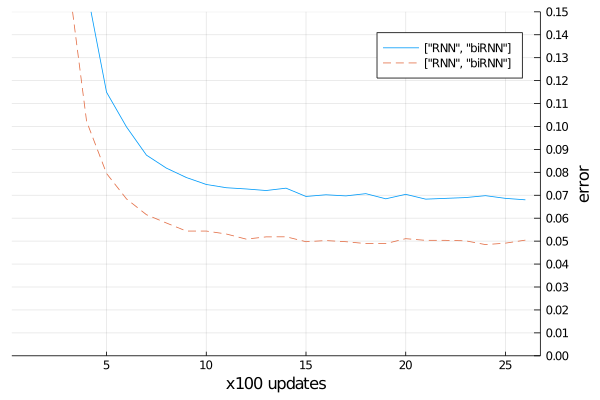

In [22]:
plot([r1[2,:], r2[2,:]]; xlabel="x100 updates", ylabel="error",
    ylim=(0,0.15), yticks=0:0.01:0.15, labels=["RNN","biRNN"])

In [23]:

wdict=Dict{String,UInt16}(); for (i,w) in enumerate(words); wdict[w]=i; end
unk = UInt16(length(words))
wid(w) = get(wdict,w,unk)
function tag(tagger,s::String)
    w = permutedims(split(s))
    t = tags[(x->x[1]).(argmax(Array(tagger(wid.(w))),dims=1))]
    vcat(w,t)
end

tag (generic function with 1 method)

In [26]:
tag(t2,readline())

stdin> i don't know what I am typing


2×7 Array{AbstractString,2}:
 "i"   "don't"  "know"  "what"  "I"     "am"   "typing"
 "nn"  "do*"    "vb"    "wdt"   "ppss"  "bem"  "vbg"   